In [1]:
import numpy as np
import pandas as pd

# 1. Data Gathering

In [2]:
## download the image-predictions.tsv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

In [3]:
import requests
import os

file = url.split('/')[-1]
path = './WeRateDogs_data/'
r = requests.get(url, stream=True)

if os.path.isfile(path + file):
    print("File {} exist!".format(file))
    #http://docs.python-requests.org/en/master/user/quickstart/#make-a-request
else:
    with(open(path + file, 'ab')) as fd:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                fd.write(chunk)

File image-predictions.tsv exist!


## 1.1 Read all seperate files

> No vpn, just use github stored files

In [2]:
# file 1
# not used this time like below rows shows
#df_json = pd.read_json('./WeRateDogs_data/tweet_json.txt', lines=True)

In [4]:
import json
## not use many this files, may just read parts of data
tweet_list=[]
with open('./WeRateDogs_data/tweet_json.txt','r') as f:
    for row in f:
        json_dict= json.loads(row)  
        to_append= {
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)
df_json=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [5]:
# file 2
df_image = pd.read_csv('./WeRateDogs_data/image-predictions.tsv', delimiter='\t')

>  p1 是对推特中图片算法 #1 的预测 → basset

>  p1_conf 是 #1 预测中算法的可信度 → 0.555712

>  p1_dog 是 #1 预测是否是狗的品种 → True

In [6]:
# file 3
df_twitter = pd.read_csv('./WeRateDogs_data/twitter-archive-enhanced.csv')

In [7]:
df_json_clean    = df_json.copy()
df_image_clean   = df_image.copy()
df_twitter_clean = df_twitter.copy()

# 2. Data Assess

### 2 types of assessment:
- Visual
- Programmatic

Step:  **Define-Code-Test**

In [8]:
df_json_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [166]:
df_json_clean['retweet_count'].value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

In [167]:
df_json_clean['favorite_count'].value_counts()

0        177
1753       3
3548       3
689        3
1526       3
520        3
465        3
171        3
3508       3
343        3
2417       3
3217       2
3846       2
1501       2
2452       2
262        2
195        2
242        2
2616       2
2250       2
3221       2
1085       2
1187       2
1722       2
248        2
1124       2
14506      2
2231       2
1861       2
5377       2
        ... 
4715       1
23100      1
2644       1
8769       1
1671       1
39492      1
1498       1
5773       1
10824      1
1046       1
21069      1
35406      1
4687       1
2381       1
31314      1
8575       1
17001      1
12887      1
2648       1
4697       1
4699       1
2652       1
6750       1
8799       1
2656       1
10852      1
5878       1
14950      1
6760       1
15858      1
Name: favorite_count, Length: 2023, dtype: int64

In [ ]:
## 我们可以推测，这个点赞（喜欢）的数据，曾在一定的问题， 不应该为0，暂时保留

In [9]:
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# 3. Data Cleaning

### Requires:

收集上述数据的每个内容后，从视觉上和程序上，对质量和清洁度进行数据评估。关键要点：

- 我们只需要含有图片的原始评级 (不包括转发)。
- 充分评估和清洗整个数据集需要巨大努力，所以只有一些问题 (至少 8 个质量问题和 2 个清洁度问题) 的子集需要进行评估和清洗。
- 根据清洗数据的规则，清洗包括合并数据的独立内容。
- 如果分子评级超过分母评级，不需要进行清洗。这个 特殊评级系统 是 WeRateDogs 人气度较高的主要原因。



#### Quality issue:
- 'df_image_clean' coloumn name 'jpg_url' should change to 'iamge_url
- 'df_twitter_clean' table: row 2327, name is 'a', that's not correct
- 'df_twitter_clean' table: row 2335, name is 'an', that's not correct
- 'df_twitter_clean' table: some column valus is 'None', not correct, like column 'name'
- 'df_twitter_clean' table: some text shows the dogs more than one types
- 'df_twitter_clean' table: rating_numerator type is int, missing some float data, need change to float
- 'df_twitter_clean' table: some rating_numerator etc select error value in table
- 'df_twitter_clean' table: some rating_numerator/rating_denominator is sum of serval dogs



#### Tidy data:
##### define: 
1. each variable forms a column
2. Each observation forms a column
3. Each type of observation form s a table

##### issue:
- 'df_twitter_clean' table: dog type [doggo floofer	pupper	puppo] should be in one column
- 'df_twitter_clean' table: timestampe should split to year, month, week ...

In [14]:
# --- No use, when merge use how='inner'
## test id connection
#df_clean[df_clean['tweet_id'] == int(df_json_cleand['id'].sample().values)]


1. ID no duplicated issue
2. ID counts in 3 files are not identical
3. ID can connect all three files *most of time*

In [178]:
## if not null, need be drop out

## 我们只需要含有图片的原始评级 (不包括转发)
## https://discussions.youdaxue.com/t/topic/56305/2
## 只需要对 image 数据集进行 merge 时选择 inner 方式，就可以删掉没有图片的推文条目了

## 3. 1 - file 2

In [88]:
#  not need ?

# df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

In [15]:
df_image_clean = df_image_clean.rename(columns={'jpg_url': 'image_url',
                                                'p1': 'Frist_prediction',
                                                'p1_conf': 'Frist_pred_conf',
                                                'p2': 'Second_prediction',
                                                'p2_conf': 'Second_pred_conf',
                                                'p3': 'Third_prediction',
                                                'p3_conf': 'Third_pred_conf',
                                                'p1_dog': 'is_dog_pred_Frist',
                                                'p2_dog': 'is_dog_pred_Second',
                                                'p3_dog': 'is_dog_pred_Third',
                                                })

In [16]:
df_image_clean.head()

,tweet_id,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_image_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [93]:
df_image_clean.nlargest(5, 'img_num')[['Frist_pred_conf', 'Second_pred_conf', 'Third_pred_conf']]

,Frist_pred_conf,Second_pred_conf,Third_pred_conf
144,0.708163,0.091372,0.067325
779,0.943331,0.023675,0.007165
1024,0.982004,0.008943,0.007550
1161,0.883991,0.023542,0.016056
1286,0.912648,0.035059,0.026376


In [99]:
df_image_clean.loc[1024, :]

tweet_id                                           710588934686908417
image_url             https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg
img_num                                                             4
Frist_prediction                                             Pembroke
Frist_pred_conf                                              0.982004
is_dog_pred_Frist                                                True
Second_prediction                                            Cardigan
Second_pred_conf                                           0.00894347
is_dog_pred_Second                                               True
Third_prediction                                             malamute
Third_pred_conf                                             0.0075499
is_dog_pred_Third                                                True
Name: 1024, dtype: object

In [ ]:
## image_num != url_num

###  3. 2 Merge files 1 and 2 

In [18]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
image_url             2075 non-null object
img_num               2075 non-null int64
Frist_prediction      2075 non-null object
Frist_pred_conf       2075 non-null float64
is_dog_pred_Frist     2075 non-null bool
Second_prediction     2075 non-null object
Second_pred_conf      2075 non-null float64
is_dog_pred_Second    2075 non-null bool
Third_prediction      2075 non-null object
Third_pred_conf       2075 non-null float64
is_dog_pred_Third     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#df_image_tweet = pd.merge(df_json_clean2, df_image_clean2, on='tweet_id', how='left')
df_image_json = pd.merge(df_json_clean, df_image_clean, on='tweet_id') # how='left', upper are not need 

In [21]:
df_image_json.head()

,tweet_id,retweet_count,favorite_count,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,892420643555336193,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [22]:
df_image_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              2073 non-null int64
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
image_url             2073 non-null object
img_num               2073 non-null int64
Frist_prediction      2073 non-null object
Frist_pred_conf       2073 non-null float64
is_dog_pred_Frist     2073 non-null bool
Second_prediction     2073 non-null object
Second_pred_conf      2073 non-null float64
is_dog_pred_Second    2073 non-null bool
Third_prediction      2073 non-null object
Third_pred_conf       2073 non-null float64
is_dog_pred_Third     2073 non-null bool
dtypes: bool(3), float64(3), int64(4), object(4)
memory usage: 200.4+ KB


### 3.3 Clean  File 3 - df_twitter_clean

In [23]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
import re

In [25]:
## get types from text

df_twitter_clean['types'] = np.nan

dog_lists = ['pupper', 'puppo', 'doggo', 'floof']

for i in range(len(df_twitter_clean.text)):
    text = df_twitter_clean.loc[i, 'text']
    types = []
    for dog in dog_lists:
        tt = re.findall(r'{}'.format(dog), text)
        if tt:
            types.append(tt[0]) #avoid more same chart.
    if types:
        df_twitter_clean.loc[i, 'types'] = ', '.join(str(x) for x in types)

        ## just little too ugly??

In [26]:
len(df_twitter_clean[df_twitter_clean.types == 'doggo'])

86

In [27]:
len(df_twitter_clean[~df_twitter_clean.types.isnull()])

418

In [22]:
df_twitter_clean[~df_twitter_clean.types.isnull()].types.value_counts()

pupper           262
doggo             86
puppo             35
floof             23
pupper, doggo     10
puppo, doggo       2
Name: types, dtype: int64

In [28]:
df_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'types'],
      dtype='object')

In [29]:
## remove some not use columns
df_twitter_clean2 = df_twitter_clean.drop(['in_reply_to_status_id',
                                          'in_reply_to_user_id', 
                                          'source',
                                          'retweeted_status_id',
                                          'retweeted_status_user_id',
                                          'retweeted_status_timestamp',
                                          'expanded_urls',
                                          'doggo',
                                          'floofer',
                                          'pupper',
                                          'puppo'], axis=1)

In [30]:
df_twitter_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
types                 418 non-null object
dtypes: int64(3), object(4)
memory usage: 128.9+ KB


### 3.3 - Clean name

In [26]:
df_twitter_clean2['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Toby              7
Buddy             7
an                7
Daisy             7
Rusty             6
Jack              6
Oscar             6
Dave              6
Leo               6
Bella             6
Jax               6
Scout             6
Stanley           6
Milo              6
Koda              6
Chester           5
               ... 
River             1
Moofasa           1
Edmund            1
Sage              1
Spanky            1
Maks              1
Buckley           1
Kaia              1
Tedders           1
Karll             1
Farfle            1
Tug               1
Lillie            1
Lizzie            1
Tuco              1
Crouton           1
Tango             1
Maude             1
Clarq             1


Checked upper results we can list some incorrect name/counts:

1. None              745 - shold replace to np.nan
2. a                  55 - not a true name
3. the                 8
4. an                  7
5. officially          1
6. his                 1
7. light               1 # maybe? all lowcase name is incorrect?

In [33]:
df_twitter_clean2[df_twitter_clean2.name == 'a'].sample().text.tolist()

['This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD']

In [ ]:
## upper line shows true name is "Jessiga"

In [41]:
df_twitter_clean2[df_twitter_clean2.name == 'the'].sample().text.tolist()

['Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx']

In [45]:
df_twitter_clean2[df_twitter_clean2.name == 'an'].sample().text.tolist()

['This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg']

In [ ]:
## upper line shows true name is "Berta"

In [46]:
df_twitter_clean2['name2'] = np.nan

for i in range(len(df_twitter_clean2['name'])):
    text = df_twitter_clean2.loc[i, 'text']
    names = re.findall(r'\s([A-Z]{1}[a-z]+)', text) # find a first letter is upper and space in front
    if len(names) > 0:
        df_twitter_clean2.loc[i, 'name2'] = names[0]

In [47]:
df_twitter_clean2['name2'].value_counts()

This           113
We              32
Meet            18
Very            18
Both            15
Please          14
Lucy            11
Charlie         11
Oliver          11
Cooper          11
Penny            9
Here             9
Tucker           9
Not              9
Pls              9
He               9
You              8
Lola             8
Toby             8
Winston          8
Sadie            8
Daisy            7
Say              7
Christmas        7
Bo               7
All              7
Louis            6
Bella            6
It               6
Stanley          6
              ... 
Alejandro        1
Andy             1
Blep             1
Dew              1
Chevy            1
Autumn           1
Molly            1
Dawn             1
Sprinkles        1
Diogi            1
Staniel          1
Eevee            1
Jeffri           1
Jonah            1
Baron            1
Tilly            1
Kingsley         1
Samsom           1
Banjo            1
Jett             1
Gunner           1
Rey         

In [48]:
df3 = df_twitter_clean2[df_twitter_clean2['name2'] != df_twitter_clean2['name']]
len(df3)

983

In [49]:
df3['name2'].value_counts()

This           113
We              32
Very            18
Meet            18
Both            15
Please          14
Pls              9
Not              9
He               9
Here             9
You              8
Christmas        7
All              7
Say              7
It               6
Good             5
Dog              5
Great            5
They             5
Friday           4
Appears          4
The              4
Monday           4
Her              3
Enjoys           3
Santa            3
Quite            3
Looks            3
New              3
So               3
              ... 
Rad              1
Forrest          1
Built            1
Blond            1
Straight         1
Wearing          1
Austrian         1
Doesn            1
Janet            1
Cool             1
Rare             1
Star             1
Inside           1
Airport          1
Airbud           1
Upgraded         1
Rich             1
Spiffy           1
Small            1
If               1
Deciduous        1
Trans       

In [ ]:
## Also found some name is not like true name

## so we can modify our code to find remove some words obvious not name

In [50]:
df_twitter_clean2['name2'] = np.nan
not_name_list = ['This', 'Meet', 'Thank', 'It', 'Both', 'Very', 'We', 'Please', 'Pls', 'He', 'You', 'Here', 'All', 'Looks', 'Not']

for i in range(len(df_twitter_clean2)):
    text = df_twitter_clean2.loc[i, 'text']
    names = re.findall(r'\s([A-Z]{1}[a-z]+)', text) # find a first letter is upper and space in front
    
    for name in not_name_list:
        if name in names:
            names.remove(name)
    
    if names:
            df_twitter_clean2.loc[i, 'name2'] = names[0]

In [51]:
df_twitter_clean2['name2'].value_counts()

Oliver         12
Charlie        12
Lucy           11
Cooper         11
Penny          10
Bo             10
Tucker         10
Lola           10
Toby            9
Winston         9
Sadie           8
Christmas       8
Buddy           7
Bailey          7
Daisy           7
Say             7
Oscar           6
Jack            6
Koda            6
Louis           6
They            6
Leo             6
Rusty           6
Dave            6
Jax             6
Great           6
Scout           6
Milo            6
Bella           6
Stanley         6
               ..
Rey             1
Siberian        1
Molly           1
Sprinkles       1
Awesome         1
Lupe            1
Eevee           1
Jeffri          1
Jonah           1
Alejandro       1
Baron           1
Kingsley        1
Samsom          1
Gunner          1
Rinna           1
Snoop           1
Mya             1
Genevieve       1
Einstein        1
Shakespeare     1
Tilly           1
Fwed            1
Aqua            1
Weird           1
Roscoe    

In [ ]:
## no found stranger name in upper line result

In [58]:
len(df_twitter_clean2[~df_twitter_clean2['name2'].isnull()])

1970

In [54]:
df4 = df_twitter_clean2[df_twitter_clean2['name2'].isnull()]

In [57]:
len(df4['name2'])

386

In [ ]:
## No found obvious strange name in upper list
## Only 386 not list name

## but, why some name valus is nan?

In [59]:
df4.text.sample().tolist()

["Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere https://t.co/bvkkqOjNDV"]

In [60]:
df4.text.sample().tolist()

['RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo']

In [61]:
df4.text.sample().tolist()

["I'm just going to leave this one here as well. 13/10 https://t.co/DaD5SyajWt"]

In [ ]:
## Yes, the text not list name, name should be nan

In [62]:
df_twitter_clean2.tail()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,types,name2
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,Enjoys
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,Piers
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,Big
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,Mitsubishi
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN,Japanese


In [65]:
## remoe original column

df_twitter_clean3 = df_twitter_clean2.drop('name', axis=1)
df_twitter_clean3.rename(columns={'name2': 'Dog_name'}, inplace=True)

In [66]:
df_twitter_clean3.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,types,Dog_name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,NaN,Franklin


### 3.3.2 clean rating_numerator & rating_denominator

In [67]:
df_twitter_clean3.rating_numerator.value_counts()[:10]

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [68]:
df_twitter_clean3.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> usual rating_denominator = 10, and rating_numerator > rating_denominator

In [ ]:
## we can rating_numerator some value is very big

## Most of rating_denominator equal 10, but still some value very small

In [69]:
df_twitter_clean3.nlargest(10, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved sq...,204,170
902,Why does this never happen at my front door......,165,150
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120
1635,Someone help the girl is being mugged. Several...,121,110
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1843,Here we have an entire platoon of puppers. Tot...,88,80
433,The floofs have been released I repeat the flo...,84,70
1202,This is Bluebert. He just saw that both #Final...,50,50


In [70]:
df_twitter_clean3.loc[1120, 'text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [ ]:
## rating is 204/170, may be here have 17 dogs, rating can be 12/10, below looks like similar

In [71]:
df_twitter_clean3.loc[1635, 'text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [72]:
df_twitter_clean3.loc[433, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [73]:
df_twitter_clean3.nsmallest(5, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
0,This is Phineas. He's a mystical boy. Only eve...,13,10
1,This is Tilly. She's just checking pup on you....,13,10


In [74]:
df_twitter_clean3.loc[2335, 'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [ ]:
# uppper lines rating is 9/10 than 1/2

In [75]:
df_twitter_clean3.loc[516, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [76]:
df_twitter_clean3.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [ ]:
## upper lines show second number set is correct rating 13/10

In [77]:
# 
df_twitter_clean3['rating_numerator']   = df_twitter_clean3['rating_numerator'].astype(float)
df_twitter_clean3['rating_denominator'] = df_twitter_clean3['rating_denominator'].astype(float)

In [119]:
## some function support get rating
def get_rate(rates):
    if len(rates)  == 2: # two list
        numerator, denominator = rate_choose(rates)
    else:
        numerator, denominator = rate_split(rates[0])
    return rate_norm(numerator, denominator)

def rate_split(rate):
    nums = rate.split('/')
    nu, de = float(nums[0]), float(nums[1])
    return nu, de

def rate_choose(rates):
    n1, m1 = rate_split(rates[0])
    n2, m2 = rate_split(rates[1])

        
    if m1 == 10.0 or m2 == 0:
        nu, de = n1, m1
    elif m2 == 10.0 or m1 == 0:
        nu, de = n2, m2
    elif n1/m1 < n2/m2: # select rating close 1
        nu, de = n2, m2        
    else:
        nu, de = n1, m1   
    return nu, de
            
def rate_norm(nu, de): 
    if not (de % 10) and de != 10:
        nu = nu / (de / 10)
        de = 10
    return nu, de

In [120]:
## get rate

for i in range(len(df_twitter_clean3)):
    text = df_twitter_clean3.loc[i, 'text']
    rates = re.findall(r'\d+\.?\d{0}\/{1}\d+', text)
    if rates:
        df_twitter_clean3.loc[i, ['rating_numerator', 'rating_denominator']] = get_rate(rates)

In [121]:
df_twitter_clean3.loc[:, 'rating_numerator'].value_counts()

12.0      562
11.0      471
10.0      463
13.0      353
9.0       158
8.0       102
14.0       56
7.0        54
5.0        37
6.0        32
3.0        19
4.0        15
2.0        10
1.0         8
75.0        2
420.0       2
0.0         2
15.0        2
17.0        1
182.0       1
27.0        1
20.0        1
26.0        1
1776.0      1
666.0       1
24.0        1
Name: rating_numerator, dtype: int64

In [92]:
## we can most rating_numerator more close 10, but still some stranger numbers

In [124]:
df_twitter_clean3[df_twitter_clean3.rating_numerator == 182.0].text.tolist()

['@markhoppus 182/10']

In [125]:
## text too simple, grabe data is ok

In [126]:
df_twitter_clean3[df_twitter_clean3.rating_numerator == 1776.0].text.tolist()

["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]

In [127]:
df_twitter_clean3[df_twitter_clean3.rating_numerator == 0.0].text.tolist()

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"]

In [128]:
df_twitter_clean3[df_twitter_clean3.rating_numerator == 1.0].text.tolist()

["RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…",
 'After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me',
 "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
 "The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you",
 'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes',
 "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
 'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx',
 "Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eg

In [129]:
df_twitter_clean3.loc[:, 'rating_denominator'].value_counts()

10.0    2353
16.0       1
7.0        1
15.0       1
Name: rating_denominator, dtype: int64

In [132]:
df_twitter_clean3[df_twitter_clean3.rating_denominator == 16.0].text.tolist()

["I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"]

In [133]:
df_twitter_clean3[df_twitter_clean3.rating_denominator == 7.0].text.tolist()

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']

In [135]:
df_twitter_clean3.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,types,Dog_name
1243,711968124745228288,2016-03-21 17:30:03 +0000,Meet Winston. He's trapped in a cup of coffee....,10.0,10.0,pupper,Winston
397,825120256414846976,2017-01-27 23:16:13 +0000,RT @dog_rates: Say hello to Pablo. He's one go...,12.0,10.0,puppo,Say
1143,727314416056803329,2016-05-03 01:50:44 +0000,This pupper was about to explain where that di...,11.0,10.0,pupper,NaN
2070,671122204919246848,2015-11-30 00:22:57 +0000,Two miniature golden retrievers here. Webbed p...,4.0,10.0,NaN,Webbed
1280,708834316713893888,2016-03-13 01:57:25 +0000,Meet Malikai. He was rolling around having fun...,10.0,10.0,NaN,Malikai
1327,705975130514706432,2016-03-05 04:36:02 +0000,This is Adele. Her tongue flies out of her mou...,10.0,10.0,pupper,Adele
1239,712092745624633345,2016-03-22 01:45:15 +0000,This is Steven. He's inverted af. Also very he...,7.0,10.0,NaN,Steven
1037,744709971296780288,2016-06-20 01:54:27 +0000,This is Harvey. He's stealthy af. 10/10 would ...,10.0,10.0,NaN,Harvey
1206,715758151270801409,2016-04-01 04:30:16 +0000,This is old now but it's absolutely heckin fan...,13.0,10.0,NaN,NaN
21,887705289381826560,2017-07-19 16:06:48 +0000,This is Jeffrey. He has a monopoly on the pool...,13.0,10.0,NaN,Jeffrey


### 3.3 - split timestamp

In [136]:
## will use month year later, should be split it later in visualize
df_twitter_clean4 = df_twitter_clean3
df_twitter_clean4['timestamp'] = pd.DatetimeIndex(df_twitter_clean4['timestamp'])

In [137]:
temp = pd.DatetimeIndex(df_twitter_clean4['timestamp'])

In [138]:
df_twitter_clean4['Year']  = temp.year
df_twitter_clean4['Month'] = temp.month
df_twitter_clean4['Date']  = temp.date

In [139]:
df_twitter_clean4['Month'].replace(1, 'January', inplace=True)
df_twitter_clean4['Month'].replace(2, 'February', inplace=True)
df_twitter_clean4['Month'].replace(3, 'March', inplace=True)
df_twitter_clean4['Month'].replace(4, 'April', inplace=True)
df_twitter_clean4['Month'].replace(5, 'May', inplace=True)
df_twitter_clean4['Month'].replace(6, 'June', inplace=True)
df_twitter_clean4['Month'].replace(7, 'July', inplace=True)
df_twitter_clean4['Month'].replace(8, 'August', inplace=True)
df_twitter_clean4['Month'].replace(9, 'September', inplace=True)
df_twitter_clean4['Month'].replace(10, 'October', inplace=True)
df_twitter_clean4['Month'].replace(11, 'November', inplace=True)
df_twitter_clean4['Month'].replace(12, 'December', inplace=True)

In [140]:
df_twitter_clean4['Day_of_Week'] = temp.dayofweek

df_twitter_clean4['Day_of_Week'].replace(0, 'Monday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(3, 'Thursday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(4, 'Friday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(5, 'Saturday', inplace=True)
df_twitter_clean4['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [141]:
df_twitter_clean4['Time'] = temp.time
df_twitter_clean4['Hour'] = temp.hour

In [142]:
df_twitter_clean4 = df_twitter_clean4.drop('timestamp', axis=1)

In [143]:
df_twitter_clean4.head()

,tweet_id,text,rating_numerator,rating_denominator,types,Dog_name,Year,Month,Date,Day_of_Week,Time,Hour
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,NaN,Phineas,2017,August,2017-08-01,Tuesday,16:23:56,16
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,2017,August,2017-08-01,Tuesday,00:17:27,0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,2017,July,2017-07-31,Monday,00:18:03,0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,2017,July,2017-07-30,Sunday,15:58:51,15
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,2017,July,2017-07-29,Saturday,16:00:24,16


In [144]:
df_twitter_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
types                 418 non-null object
Dog_name              1970 non-null object
Year                  2356 non-null int64
Month                 2356 non-null object
Date                  2356 non-null object
Day_of_Week           2356 non-null object
Time                  2356 non-null object
Hour                  2356 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 221.0+ KB


## 3.4 Merge file3 to previous merged file

In [145]:
twitter_archive_master = pd.merge(df_twitter_clean4, df_image_json, on='tweet_id')

In [146]:
twitter_archive_master.head()

,tweet_id,text,rating_numerator,rating_denominator,types,Dog_name,Year,Month,Date,Day_of_Week,...,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,NaN,Phineas,2017,August,2017-08-01,Tuesday,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,2017,August,2017-08-01,Tuesday,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,2017,July,2017-07-31,Monday,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,2017,July,2017-07-30,Sunday,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,2017,July,2017-07-29,Saturday,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### 4 Saved clean files

In [147]:
#twitter_archive_master.to_csv('./WeRateDogs_data/twitter_archive_master.csv')
# will keep index, not correct, 
# ref to: https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv/25230582#25230582

twitter_archive_master.to_csv('./WeRateDogs_data/twitter_archive_master.csv', index=False)

## 5 Data Analysis and Visualizations

In [151]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null int64
text                  2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null float64
types                 357 non-null object
Dog_name              1788 non-null object
Year                  2073 non-null int64
Month                 2073 non-null object
Date                  2073 non-null object
Day_of_Week           2073 non-null object
Time                  2073 non-null object
Hour                  2073 non-null int64
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
image_url             2073 non-null object
img_num               2073 non-null int64
Frist_prediction      2073 non-null object
Frist_pred_conf       2073 non-null float64
is_dog_pred_Frist     2073 non-null bool
Second_prediction     2073 non-null object
Second_pred_conf      2073 non-null flo

In [150]:
twitter_archive_master.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,types,Dog_name,Year,Month,Date,Day_of_Week,...,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
1165,700462010979500032,This is Murphy. He's a mini golden retriever. ...,6.0,10.0,NaN,Murphy,2016,February,2016-02-18,Thursday,...,1,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
489,796865951799083009,This is Tyr. He's just checking on you. Nifty ...,12.0,10.0,NaN,Tyr,2016,November,2016-11-11,Friday,...,1,Cardigan,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True
1209,697259378236399616,Please stop sending in saber-toothed tigers. T...,8.0,10.0,NaN,NaN,2016,February,2016-02-10,Wednesday,...,1,Great_Dane,0.999223,True,boxer,0.000187,True,whippet,0.000151,True
627,775842724423557120,This is Blue. He was having an average day unt...,12.0,10.0,NaN,Blue,2016,September,2016-09-13,Tuesday,...,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True
1832,670442337873600512,Meet Koda. He's large. Looks very soft. Great ...,11.0,10.0,NaN,Koda,2015,November,2015-11-28,Saturday,...,1,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True


In [149]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,Year,Hour,retweet_count,favorite_count,img_num,Frist_pred_conf,Second_pred_conf,Third_pred_conf
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.383196e+17,11.706705,9.998553,2015.864930,9.684515,2959.425953,8583.081524,1.203087,0.594555,1.345907e-01,6.034121e-02
std,6.775074e+16,39.885621,0.065890,0.698931,8.629875,5029.269674,12281.014912,0.561601,0.271217,1.006855e-01,5.092740e-02
min,6.660209e+17,0.000000,7.000000,2015.000000,0.000000,15.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,10.000000,10.000000,2015.000000,1.000000,630.000000,1665.000000,1.000000,0.364095,5.387110e-02,1.619920e-02
50%,7.119681e+17,11.000000,10.000000,2016.000000,4.000000,1401.000000,3846.000000,1.000000,0.588230,1.181810e-01,4.947150e-02
75%,7.931808e+17,12.000000,10.000000,2016.000000,18.000000,3420.000000,10902.000000,1.000000,0.843911,1.955580e-01,9.193000e-02
max,8.924206e+17,1776.000000,10.000000,2017.000000,23.000000,79116.000000,132318.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## From upper data We know:

1. 总共2073个有效数据；使用热度变化会是如何呢？

2. 平均点赞数为8583，平均转发数为2959， 最大点赞数，转发次数分别为132318，79116， 所以，转发点赞数有什么一般关系呢

3. 评分的分子分母（rating_numerato／rating_denominator均值分别是11.706705／9.998553， 一般来说分子大于分母， 分母接近10

~~4. 第一次狗狗图片预测平均概率为0.594555，中值为0.588230， 不知道预测率会不会有明显提升趋势呢~~

In [152]:
import matplotlib.pyplot as plt
% matplotlib inline

### 6.1. This tweep hot trends

In [153]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0]
tweets_per_month

Month      Year
November   2015    298
December   2015    367
January    2016    169
February   2016    111
March      2016    121
April      2016     54
May        2016     57
June       2016     81
July       2016     94
August     2016     64
September  2016     71
October    2016     71
November   2016     69
December   2016     61
January    2017     77
February   2017     68
March      2017     53
April      2017     44
May        2017     45
June       2017     46
July       2017     50
August     2017      2
Name: tweet_id, dtype: int64

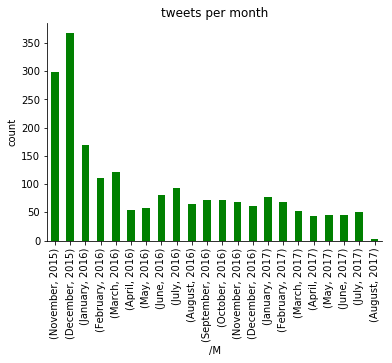

In [154]:
fig, ax = plt.subplots()
tweets_per_month.plot(kind='bar', color='g')
#tweets_per_month.plot(kind='line', color='r')
ax.set_title('tweets per month')
ax.set_ylabel('count')
ax.set_xlabel('/M')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

从上图可知道：
1. 这个推特的热度在上线后迅速获得关注，热度很高，2015年的11和12两月有三百以上的用户使用。
2. 经过前五个月后，热度有明显的下降，大约60个用户一个月， 而且数据相当平稳

### 6.2 favorite_count 和	retweet_count的关系

In [230]:
ratio = twitter_archive_master['favorite_count'] / twitter_archive_master['retweet_count']

In [231]:
ratio.describe()

count    2073.000000
mean        3.236245
std         1.308540
min         0.000000
25%         2.486004
50%         3.148541
75%         3.890883
max        12.024368
dtype: float64

> 从中位数和平均数看，大约3.2次点赞会转发一次, 相关性很高

In [232]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.80698364190817873

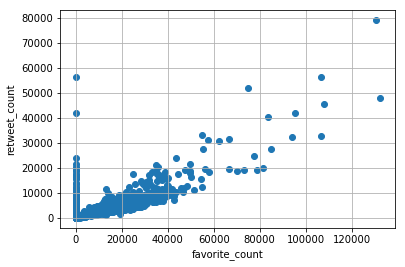

In [161]:
x = twitter_archive_master['favorite_count'] 
y = twitter_archive_master['retweet_count']

plt.figure()
plt.scatter(x, y, marker='o')
plt.grid(True)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [173]:
## 从图上可知，有部分数据点赞数为0, 应该不正确

In [172]:
df6 = twitter_archive_master[twitter_archive_master['favorite_count'] == 0][['retweet_count', 'favorite_count']]
len(df6)

79

In [169]:
df6.sample(10)

,retweet_count,favorite_count
531,4818,0
389,3717,0
237,86,0
170,23,0
81,12435,0
708,20400,0
585,7196,0
723,24183,0
132,879,0
268,10673,0


In [193]:
df7 = twitter_archive_master.copy()

In [196]:
df7.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'types',
       'Dog_name', 'Year', 'Month', 'Date', 'Day_of_Week', 'Time', 'Hour',
       'retweet_count', 'favorite_count', 'image_url', 'img_num',
       'Frist_prediction', 'Frist_pred_conf', 'is_dog_pred_Frist',
       'Second_prediction', 'Second_pred_conf', 'is_dog_pred_Second',
       'Third_prediction', 'Third_pred_conf', 'is_dog_pred_Third'],
      dtype='object')

In [212]:
df8 = df7[~(df7['favorite_count'] == 0)]

In [213]:
df8[df8['favorite_count'] == 0][['retweet_count', 'favorite_count']]

,retweet_count,favorite_count


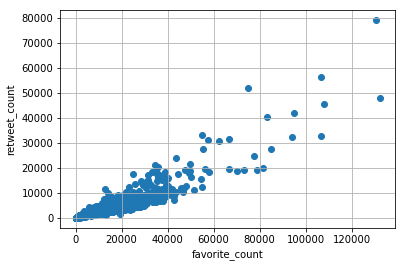

In [214]:
## plot 2, remove incorrect favoriate counts

x = df8['favorite_count'] 
y = df8['retweet_count']

plt.figure()
plt.scatter(x, y, marker='o')
plt.grid(True)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [226]:
# more clearly than before

In [217]:
ratio = df8['favorite_count'] / df8['retweet_count']
ratio.describe()

count    1994.000000
mean        3.364461
std         1.161273
min         1.099228
25%         2.550980
50%         3.186503
75%         3.946890
max        12.024368
dtype: float64

In [218]:
df8['favorite_count'].corr(df8['retweet_count'])

0.91502202211515782

去掉不干净的数据，点赞数和转发数相关性更高了， 也更真实

### 6.3 如何给狗狗取名字呢？

In [224]:
df9 = df8['Dog_name'].value_counts()
df9

Cooper        11
Oliver        11
Charlie       11
Lucy          10
Tucker         9
Penny          9
Toby           9
Christmas      8
Winston        8
Sadie          8
Daisy          7
Lola           7
Bo             7
Koda           6
Bella          6
Jax            6
Stanley        6
Great          6
Dave           5
Oscar          5
Louis          5
Good           5
Rusty          5
Milo           5
Buddy          5
Chester        5
Scout          5
Jack           5
Leo            5
Bailey         5
              ..
Chevy          1
Monty          1
Spiffy         1
Snoopy         1
Bookstore      1
Tugs           1
Lipton         1
Pete           1
Rhino          1
Dev            1
Emmie          1
Rich           1
Blep           1
Dew            1
Siberian       1
Jett           1
Molly          1
Dawn           1
Sprinkles      1
Diogi          1
Pup            1
Lupe           1
Eevee          1
Jonah          1
Alejandro      1
Baron          1
Kingsley       1
Samsom        

> 看来给狗狗取名还是很随便的，以上数据看不出什么名字跟狗狗更流行